In [31]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
np.random.seed(42)



In [191]:
## Below Set of files are meant for German,Persian and the Combined dataset;

#German dataset;
train_ds = r"D:2nd Semester\Deep Learning\Project - Computer Visison\Traffic Sign Classification\archive (1)-GR\train";
test_ds  = r"D:\2nd Semester\Deep Learning\Project - Computer Visison\Traffic Sign Classification\archive (1)-GR\test";
#total class 
total_class = len(os.listdir(train_ds));
print(total_class);

43


In [192]:
# These lines of code are used for data visualization and label extractions
folder_path =r"D:\2nd Semester\Deep Learning\Project - Computer Visison\Traffic Sign Classification\german.txt";
german_classes ={}
with open(folder_path) as f:
    for line in f:
        #print(line.split(":"))
        (key,val) = line.split(":");
        german_classes[int(key)] = val
print(str(german_classes.keys()))


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])


In [205]:
training_data = [];
img_size = 30;
datadir = r"D:\2nd Semester\Deep Learning\Project - Computer Visison\Traffic Sign Classification\archive (1)-GR\train";
categories_list =  list((german_classes.keys()));
print(categories);
categories = [str(x) for x in categories_list] # for folers search 
def create_trainingdata():
    for category in categories:
        path = os.path.join(datadir,category)# to individual category 
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))#retaining the colors 
                new_array = cv2.resize(img_array,(img_size,img_size));
                training_data.append([new_array,int(category)]);
            except:
                pass
create_trainingdata();
print("Training_data created")

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']
Training_data created


In [206]:
#Shuffling the data ;
import random;
random.shuffle(training_data);

In [207]:
train_data = [];
train_label = [];
for features,label in training_data:
    train_data.append(features);
    train_label.append(label);
train_data = np.array(train_data).reshape(-1,img_size,img_size,3);
train_label= np.array(train_label);
print("Shape of train_data ", train_data.shape);

print("Shape of train_label",train_label.shape)

Shape of train_data  (39209, 30, 30, 3)
Shape of train_label (39209,)


In [209]:
#Splitting the data into X_train and Y_train;
X_train, X_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.3, random_state=42, shuffle=True)
#Normalizing the features 
X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)


X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [ ]:
#One hot coding;
category = len(categories_list);
y_train = keras.utils.to_categorical(y_train, category)
y_val = keras.utils.to_categorical(y_val, category)

print(y_train.shape)
print(y_val.shape)

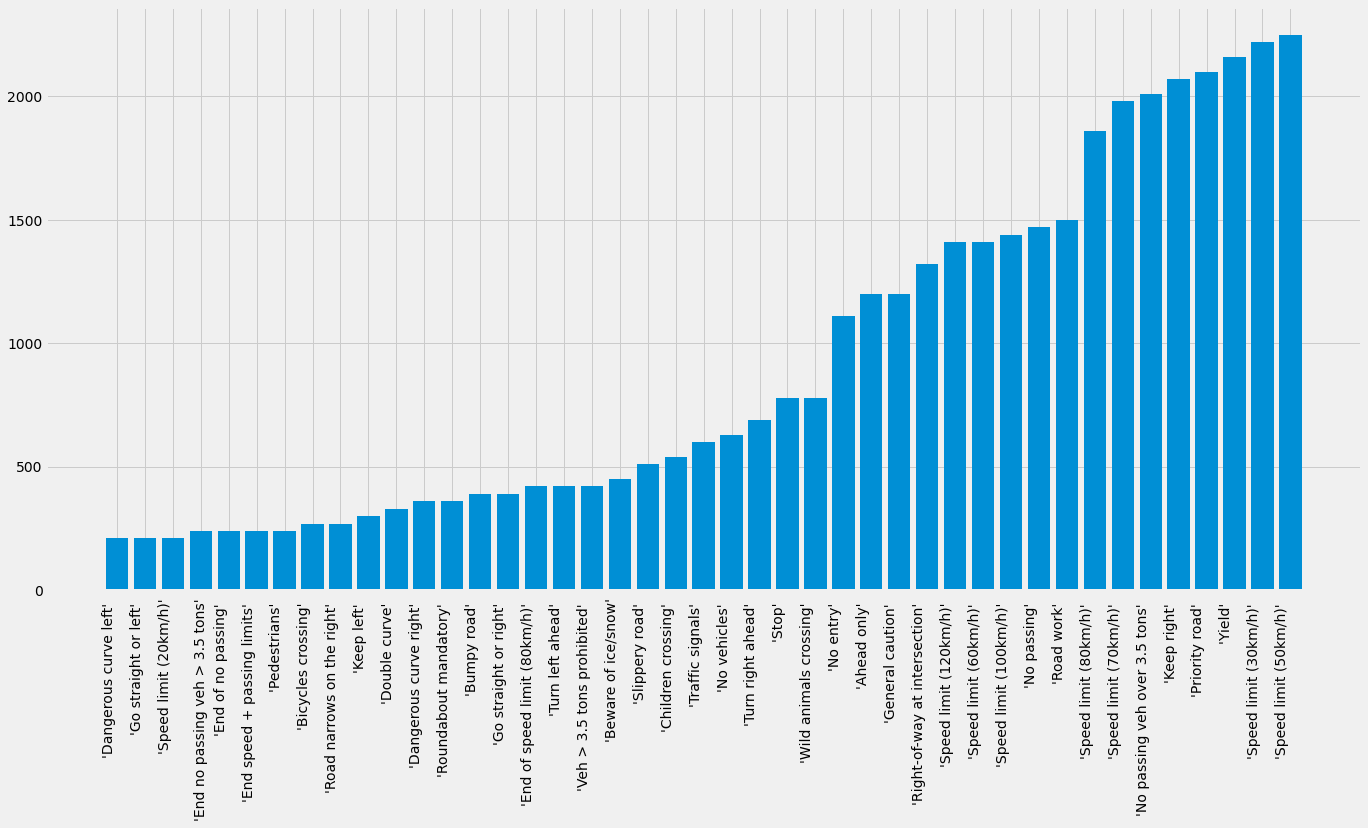

In [90]:
#Data Visuzlization has been taken from open Souce
folders = os.listdir(train_ds)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_ds + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(german_classes[int(folder)])
    #print(class_num)
    
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

['Test/00000.png' 'Test/00001.png' 'Test/00002.png' ... 'Test/12627.png'
 'Test/12628.png' 'Test/12629.png']


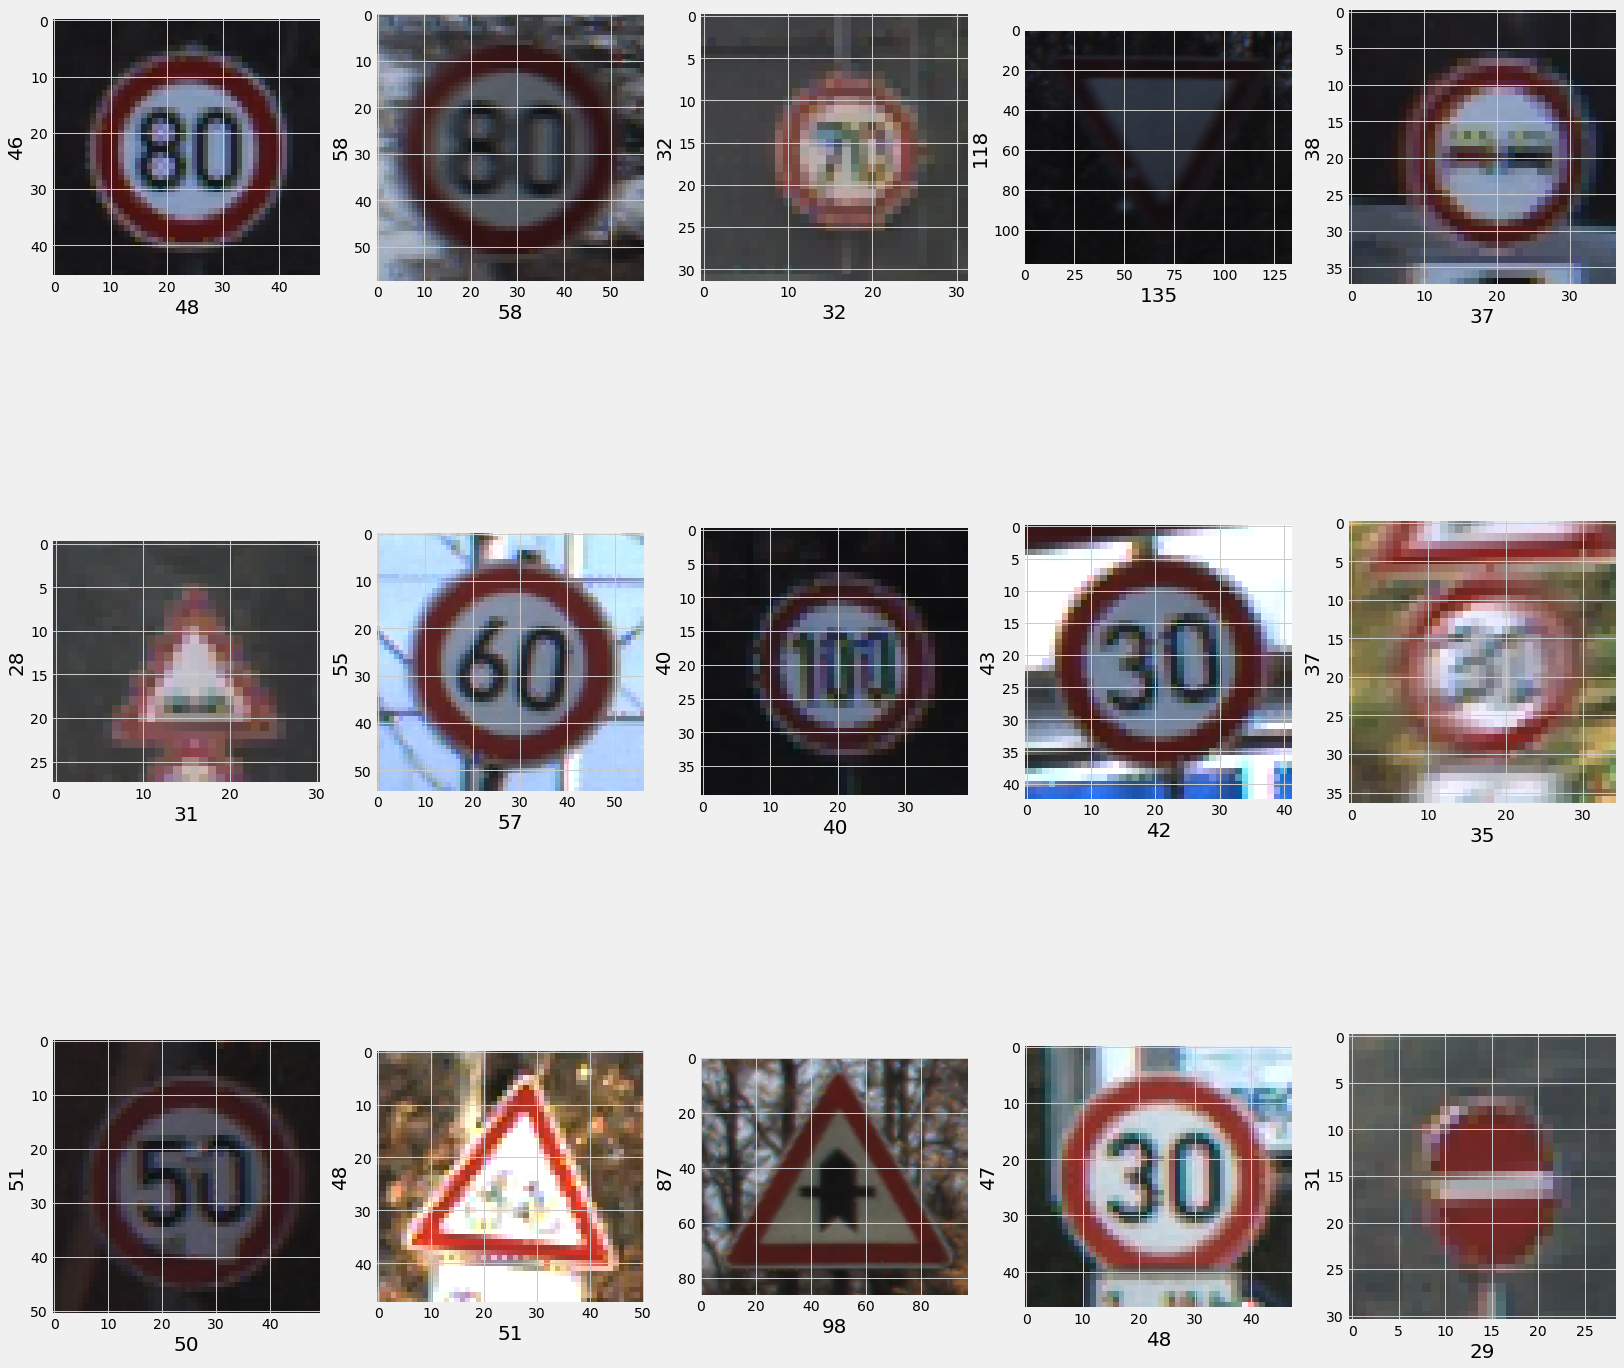

In [107]:
# Data Visualization has been taken from Open Source 

# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(r"D:\2nd Semester\Deep Learning\Project - Computer Visison\Traffic Sign Classification\archive (1)-GR\Test.csv")
imgs = test["Path"].values
plt.figure(figsize=(25,25))
test_dir = r"D:\2nd Semester\Deep Learning\Project - Computer Visison\Traffic Sign Classification\archive (1)-GR"
print(imgs)
for i in range(1,16):
    plt.subplot(3,5,i)
    random_img_path = test_dir + '/' + random.choice(imgs)
    #test_files = os.listdir(test_dir + '/' + folder)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image
